# Projeto de biomecânica

# Importando as bibliotecas:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

data = '/content/drive/MyDrive/PJ_ML/BDS'

caminho_do_arquivo = '/content/drive/MyDrive/PJ_ML/BDS/BDSinfo.xlsx'



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Análise exploratória:

In [17]:
df = pd.read_excel(caminho_do_arquivo)
df

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date
0,BDS00001,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
1,BDS00002,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
2,BDS00003,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
3,BDS00004,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
4,BDS00005,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,BDS01952,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1926,BDS01953,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1927,BDS01954,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1928,BDS01955,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Trial              1930 non-null   object        
 1   Subject            1930 non-null   int64         
 2   Vision             1930 non-null   object        
 3   Surface            1930 non-null   object        
 4   Age                1930 non-null   float64       
 5   AgeGroup           1930 non-null   object        
 6   Gender             1930 non-null   object        
 7   Height             1930 non-null   float64       
 8   Weight             1930 non-null   float64       
 9   BMI                1930 non-null   float64       
 10  FootLen            1906 non-null   float64       
 11  Nationality        1930 non-null   object        
 12  SkinColor          1930 non-null   object        
 13  Ystudy             1930 non-null   int64         
 14  Footwear

Contagem do número de variáveis NaN:
Trial      0
Subject    0
Vision     0
Surface    0
Age        0
          ..
Best_12    0
Best_13    0
Best_14    0
Best_T     0
Date       0
Length: 64, dtype: int64
1930


<Axes: >

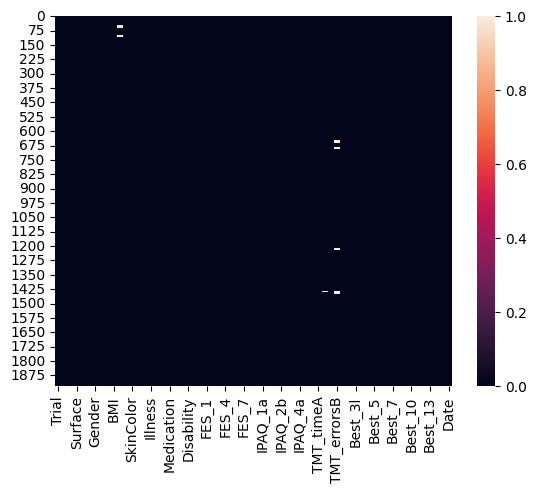

In [19]:
print('Contagem do número de variáveis NaN:')
print(df.isna().sum())


print(len(df))
sns.heatmap(df.isnull())

Contagem do número de variáveis NaN:
FootLen        24
TMT_errorsA     4
TMT_errorsB    52
dtype: int64


<Axes: >

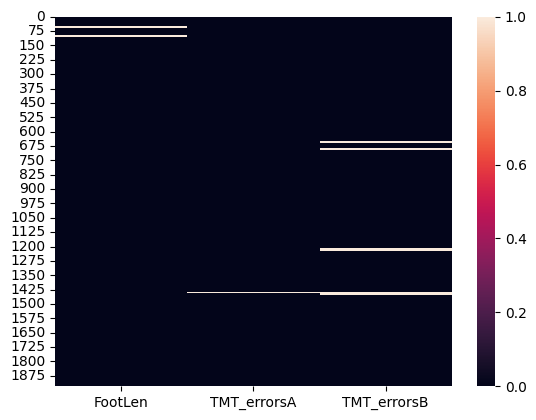

In [20]:
cols_com_nan = df.columns[df.isna().any()].tolist()

print('Contagem do número de variáveis NaN:')
print(df[cols_com_nan].isna().sum())

sns.heatmap(df[cols_com_nan].isnull())


# Pré-processamento:

Transformar as variáveis "Vision" (1 - Open, 0 - Closed), "Surface" (Firm - 1, Foam - 0), "AgeGroup" (1 - Young, 0 - Old) em binárias.

In [22]:
df['Vision'] = df['Vision'].replace(['Open','Closed'], [1,0])

df['Surface'] = df['Surface'].apply(lambda x: 1 if x == 'Firm' else 0)

df['AgeGroup'] = df['AgeGroup'].apply(lambda x: 1 if x == 'Young' else 0)

df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)



Transformar as variáveis "SkinColor" em numérica.

In [30]:
df['SkinColor'] = df['SkinColor'].replace(['Yellow', 'Pardo/Brown', 'White', 'Black', '-', 'Indigenous'], [0, 1, 2, 3 ,4, 5])

df['Nationality'] = df['Nationality'].replace(['Brazil', 'Peru', 'Colombia', 'Chile', 'Mexico', 'Portugal', 'Venezuela']
, [0, 1, 2, 3 ,4, 5, 6])


In [36]:
df

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date
0,BDS00001,1,1,1,33.000000,1,1,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
1,BDS00002,1,1,1,33.000000,1,1,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
2,BDS00003,1,1,1,33.000000,1,1,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
3,BDS00004,1,0,1,33.000000,1,1,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
4,BDS00005,1,0,1,33.000000,1,1,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,BDS01952,163,1,1,25.416667,1,0,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1926,BDS01953,163,1,1,25.416667,1,0,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1927,BDS01954,163,0,0,25.416667,1,0,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1928,BDS01955,163,0,0,25.416667,1,0,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538


In [29]:
l = []
for i in df['Nationality'].unique():
  l.append(i)
print(l)

['Brazil', 'Peru', 'Colombia', 'Chile', 'Mexico', 'Portugal', 'Venezuela']
